In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import numpy as np
import pandas as pd

In [2]:
train_dir = "images/training"
test_dir = "images/test"

### Step 1 - Load Data and Visualization

In [3]:
# function to make all list path from the image
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')
    
    img_list = []
    
    for dir in dirs:
        label = str(dir).split('\\')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            
            if not img is None:
                img_list.append((img, label))
    
    return img_list

In [4]:
# load training data
train_img = load_dataset(train_dir)

In [5]:
train_img[0]

(array([[[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [176, 209, 228],
         [177, 210, 229],
         [177, 210, 229]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [180, 213, 232],
         [180, 213, 232],
         [180, 213, 232]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [177, 210, 229],
         [177, 210, 229],
         [177, 210, 229]],
 
        ...,
 
        [[ 35,  40,  43],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 65,  73,  75],
         [ 65,  73,  75],
         [ 65,  73,  75]],
 
        [[ 36,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
         [ 68,  76,  78],
         [ 65,  73,  75]],
 
        [[ 37,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
  

In [6]:
# random size checking
pick_random = np.random.randint(0, len(train_img))

# check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)


Image 131
(372, 640, 3)


In [7]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (591, 800, 3)
Label	: night


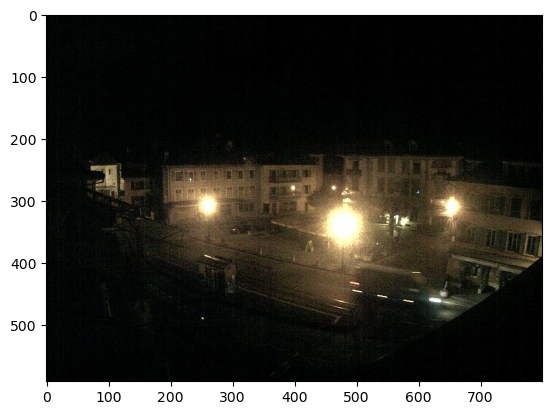

In [8]:
random_img_viz(train_img)

### Step 2 - Data Preprocessing

In [9]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))
    return std_img

In [10]:
def label_encoder(label):
    # encode label - day as 1 night as 0
    num_val = 0
    
    if(label == 'day'):
        num_val = 1
    return num_val

In [11]:
def preprocess(img_list):
    std_img_list = []
    for item in img_list:
        image = item[0]
        label = item[1]
        
        # standarized the image
        std_img = standarized_input(image)
        
        # create the label
        img_label = label_encoder(label)
        
        std_img_list.append((std_img, img_label))
    return std_img_list

In [12]:
train_std_img_list = preprocess(train_img)

In [13]:
pick_random = np.random.randint(0, len(train_std_img_list))
print(f'Image {pick_random}')                
print(train_std_img_list[pick_random][0].shape)

Image 27
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 1


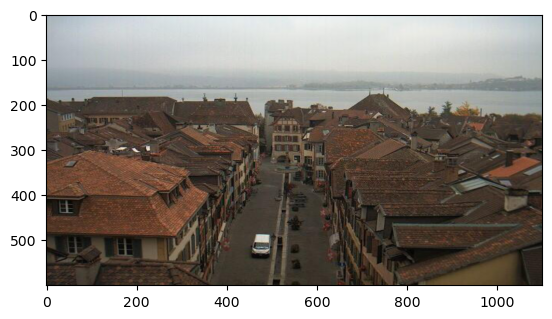

In [14]:
random_img_viz(train_std_img_list)

### Step 3 - Feature Extraction

In [15]:
def avg_brightness(image):
    # convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    
    # calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2])
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area
    
    return avg

Image 93
Avg Brighness: 115.0582


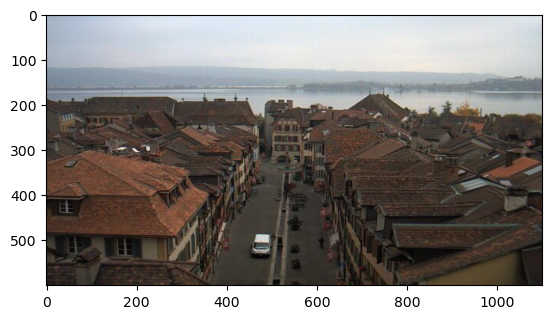

In [16]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))
feature_img = train_std_img_list[rand_img][0]
avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

### Step 4 - Classification with Threshold Method

In [17]:
def predict_label(img, threshold):
    avg = avg_brightness(img)
    pred = 0
    
    if avg > threshold:
        pred = 0
    
    return pred

Image 232
Actual label: 0
Predicted label: 0


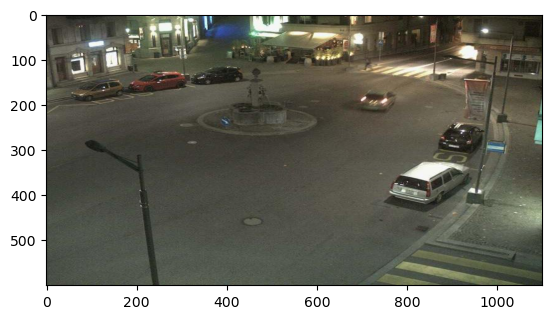

In [18]:
rand_img = np.random.randint(0, len(train_std_img_list))
pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

### Step 5 - Evaluate (Manual)

In [19]:
def evaluate(img_list, threshold):
    miss_labels = []
    
    for file in img_list:
        img = file[0]
        label = file[1]
        
        pred_label = predict_label(img, threshold)
        
        if pred_label != label:
            miss_labels.append((img, pred_label, label))
    
    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img
    
    print(f'Accuracy: {accuracy:.4f}')

In [20]:
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.5000


In [21]:
# evaluate on data test

test_img = load_dataset(test_dir)
test_std_img_list = preprocess(test_img)

evaluate(test_std_img_list, threshold=120)


Accuracy: 0.5000


## Another Way - Create Feature Vectors and Classification with SVM

### Step 3 Alternative - Create Feature Vectors

In [27]:
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []
    
    for img in img_list:
        img_avg = avg_brightness(img[0])
        img_label = img[1]
        
        avg_list.append(img_avg)
        labels.append(img_label)
        
    data = np.column_stack((avg_list, labels))
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])
    
    return df

In [28]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,175.129871,1.0
1,192.954773,1.0
2,132.141432,1.0
3,199.784797,1.0
4,109.964702,1.0


In [29]:
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,194.267453,1.0
1,157.844245,1.0
2,201.646592,1.0
3,191.273192,1.0
4,188.152729,1.0


### Step 4 Alternative

In [31]:
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

### Step 5 Alternative

In [32]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred)
y_test_pred = model.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)

print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9
